In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_excel('DraftedPlayers2009-2021.xlsx')
df

,PLAYER,TEAM,AFFILIATION,YEAR,ROUND,ROUND.1,OVERALL
0,NaN,NaN,NaN,NaN,NUMBER,PICK,PICK
1,Cade Cunningham,Detroit Pistons,Oklahoma State,2021.0,1,1,1
2,Jalen Green,Houston Rockets,Ignite (G League),2021.0,1,2,2
3,Evan Mobley,Cleveland Cavaliers,Southern California,2021.0,1,3,3
4,Scottie Barnes,Toronto Raptors,Florida State,2021.0,1,4,4
...,...,...,...,...,...,...,...
776,Ahmad Nivins,Dallas Mavericks,Saint Joseph's,2009.0,2,26,56
777,Emir Preldzic,Phoenix Suns,Fenerbahce S.K. (Turkey),2009.0,2,27,57
778,Lester Hudson,Boston Celtics,Tennessee-Martin,2009.0,2,28,58
779,Chinemelu Elonu,Los Angeles Lakers,Texas A&M,2009.0,2,29,59


In [4]:
df2 = pd.read_csv('CollegeBasketballPlayers2009-2021.csv')
df2

C:\Users\Flo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61056,Trey Patterson,Villanova,BE,2,0.3,60.5,19.3,0.0,0.00,0.0,...,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,Pure PG,0.00000
61057,Stavros Polatoglou,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,...,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,C,0.00000
61058,Sandy Ryan,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,...,-1.126810,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000
61059,Ty Larson,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,0.0,...,-2.380750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000


In [5]:
df2[df2['player_name']== 'Kyrie Irving']


,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
13221,Kyrie Irving,Duke,ACC,11,20.5,130.5,27.2,61.5,69.7,2.3,...,4.37825,0.5455,2.8182,3.3636,4.2727,1.4545,0.5455,17.4545,Scoring PG,7.29491


In [8]:
counts = df2.nunique()
counts['pid']

25745

In [5]:
df2.columns

Index(['player_name', 'team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG',
       'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA',
       'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per',
       'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe',
       'pfr', 'year', 'pid', 'type', 'Rec Rank', 'ast/tov', 'rimmade',
       'rimmade+rimmiss', 'midmade', 'midmade+midmiss',
       'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade',
       'dunksmiss+dunksmade', 'dunksmade/(dunksmade+dunksmiss)', 'pick',
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', 'Unnamed: 64', 'Unnamed: 65'],
      dtype='object')

In [6]:
df3 = pd.merge(df, df2, how='left', left_on='PLAYER', right_on='player_name')
df3

,PLAYER,TEAM,AFFILIATION,YEAR,ROUND,ROUND.1,OVERALL,player_name,team,conf,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,NaN,NaN,NaN,NaN,NUMBER,PICK,PICK,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cade Cunningham,Detroit Pistons,Oklahoma State,2021.0,1,1,1,Cade Cunningham,Oklahoma St.,B12,...,2.536370,0.7037,5.4815,6.1852,3.4444,1.5926,0.7778,20.2222,Wing F,8.872600
2,Jalen Green,Houston Rockets,Ignite (G League),2021.0,1,2,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Evan Mobley,Cleveland Cavaliers,Southern California,2021.0,1,3,3,Evan Mobley,USC,P12,...,5.252480,2.7273,5.9394,8.6667,2.3939,0.7879,2.8485,16.3636,C,2.101970
4,Scottie Barnes,Toronto Raptors,Florida State,2021.0,1,4,4,Scottie Barnes,Florida St.,ACC,...,2.995100,1.4583,2.5417,4.0000,4.0833,1.4583,0.4583,10.3333,Scoring PG,3.850450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,Ahmad Nivins,Dallas Mavericks,Saint Joseph's,2009.0,2,26,56,Ahmad Nivins,Saint Joseph's,A10,...,0.898667,3.9375,7.8750,11.8125,1.0000,0.8125,1.7500,19.1562,NaN,0.048109
1667,Emir Preldzic,Phoenix Suns,Fenerbahce S.K. (Turkey),2009.0,2,27,57,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1668,Lester Hudson,Boston Celtics,Tennessee-Martin,2009.0,2,28,58,Lester Hudson,Tennessee Martin,OVC,...,1.135300,2.2000,5.8667,8.0667,4.1333,2.1000,0.6000,27.7333,NaN,14.790600
1669,Chinemelu Elonu,Los Angeles Lakers,Texas A&M,2009.0,2,29,59,Chinemelu Elonu,Texas A&M,B12,...,2.007480,2.7879,4.4242,7.2121,0.3030,0.3030,1.5758,9.7273,NaN,0.000000


In [7]:
perc = 50.0 
min_count =  int(((100-perc)/100)*df3.shape[1] + 1)
mod_df = df3.dropna( axis=0, 
                    thresh=min_count)

mod_df = mod_df.reset_index(drop=True)
mod_df


,PLAYER,TEAM,AFFILIATION,YEAR,ROUND,ROUND.1,OVERALL,player_name,team,conf,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,Cade Cunningham,Detroit Pistons,Oklahoma State,2021.0,1,1,1,Cade Cunningham,Oklahoma St.,B12,...,2.536370,0.7037,5.4815,6.1852,3.4444,1.5926,0.7778,20.2222,Wing F,8.872600
1,Evan Mobley,Cleveland Cavaliers,Southern California,2021.0,1,3,3,Evan Mobley,USC,P12,...,5.252480,2.7273,5.9394,8.6667,2.3939,0.7879,2.8485,16.3636,C,2.101970
2,Scottie Barnes,Toronto Raptors,Florida State,2021.0,1,4,4,Scottie Barnes,Florida St.,ACC,...,2.995100,1.4583,2.5417,4.0000,4.0833,1.4583,0.4583,10.3333,Scoring PG,3.850450
3,Jalen Suggs,Orlando Magic,Gonzaga,2021.0,1,5,5,Jalen Suggs,Gonzaga,WCC,...,4.111230,0.6000,4.7333,5.3333,4.5333,1.9000,0.3333,14.3000,Combo G,6.422830
4,Franz Wagner,Orlando Magic,Michigan,2021.0,1,8,8,Franz Wagner,Michigan,B10,...,3.054800,0.8889,4.7037,5.5926,1.0000,1.2593,0.5926,11.5556,Wing F,9.227110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,Patty Mills,Portland Trail Blazers,St. Mary's (CA),2009.0,2,25,55,Patty Mills,Saint Mary's,WCC,...,2.186160,0.4583,1.8333,2.2917,3.7917,2.2083,0.2083,18.6250,NaN,14.264300
1483,Ahmad Nivins,Dallas Mavericks,Saint Joseph's,2009.0,2,26,56,Ahmad Nivins,Saint Joseph's,A10,...,0.898667,3.9375,7.8750,11.8125,1.0000,0.8125,1.7500,19.1562,NaN,0.048109
1484,Lester Hudson,Boston Celtics,Tennessee-Martin,2009.0,2,28,58,Lester Hudson,Tennessee Martin,OVC,...,1.135300,2.2000,5.8667,8.0667,4.1333,2.1000,0.6000,27.7333,NaN,14.790600
1485,Chinemelu Elonu,Los Angeles Lakers,Texas A&M,2009.0,2,29,59,Chinemelu Elonu,Texas A&M,B12,...,2.007480,2.7879,4.4242,7.2121,0.3030,0.3030,1.5758,9.7273,NaN,0.000000


In [8]:
pd.concat(g for _, g in mod_df.groupby("PLAYER") if len(g) > 1)

,PLAYER,TEAM,AFFILIATION,YEAR,ROUND,ROUND.1,OVERALL,player_name,team,conf,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
387,Aaron Holiday,Indiana Pacers,California-Los Angeles,2018.0,1,23,23,Aaron Holiday,UCLA,P12,...,1.405550,0.5938,2.4062,3.0000,3.9688,1.4062,0.2500,10.3438,Scoring PG,5.10103
388,Aaron Holiday,Indiana Pacers,California-Los Angeles,2018.0,1,23,23,Aaron Holiday,UCLA,P12,...,0.777734,0.3333,2.5278,2.8611,4.3889,1.0833,0.1667,12.2500,Scoring PG,7.33543
389,Aaron Holiday,Indiana Pacers,California-Los Angeles,2018.0,1,23,23,Aaron Holiday,UCLA,P12,...,0.140775,0.5152,3.1515,3.6667,5.8182,1.2727,0.2424,20.3333,Scoring PG,9.19170
137,Aaron Nesmith,Boston Celtics,Vanderbilt,2020.0,1,14,14,Aaron Nesmith,Vanderbilt,SEC,...,1.349930,1.0625,4.4688,5.5312,1.4062,0.7188,0.5625,11.0312,Stretch 4,10.88530
138,Aaron Nesmith,Boston Celtics,Vanderbilt,2020.0,1,14,14,Aaron Nesmith,Vanderbilt,SEC,...,0.281327,0.7857,4.0714,4.8571,0.9286,1.4286,0.8571,23.0000,Wing G,13.08560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,Willie Warren,Los Angeles Clippers,Oklahoma,2010.0,2,24,54,Willie Warren,Oklahoma,B12,...,-0.483223,0.6667,2.6190,3.2857,4.0952,1.0000,0.0476,16.3333,Scoring PG,8.48970
914,Xavier Thames,Toronto Raptors,San Diego State,2014.0,2,29,59,Xavier Thames,Washington St.,P10,...,0.876330,0.4333,1.0333,1.4667,1.2667,0.8000,0.0333,4.7333,Combo G,3.75081
915,Xavier Thames,Toronto Raptors,San Diego State,2014.0,2,29,59,Xavier Thames,San Diego St.,MWC,...,1.318630,0.4839,2.7419,3.2258,4.1290,0.9677,0.2258,10.0968,Scoring PG,2.97591
916,Xavier Thames,Toronto Raptors,San Diego State,2014.0,2,29,59,Xavier Thames,San Diego St.,MWC,...,1.998540,0.4643,2.2143,2.6786,2.3929,1.0714,0.3214,9.2857,Combo G,7.46849


In [9]:
pd.set_option('display.max_columns',None)
mod_df[mod_df['PLAYER']== 'Franz Wagner']

,PLAYER,TEAM,AFFILIATION,YEAR,ROUND,ROUND.1,OVERALL,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,type,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
4,Franz Wagner,Orlando Magic,Michigan,2021.0,1,8,8,Franz Wagner,Michigan,B10,27.0,66.1,105.5,18.6,53.4,56.59,3.4,16.8,5.9,15.0,45.0,54.0,0.833,72.0,118.0,0.610,41.0,132.0,0.311,1.8,2.4,21.6,Fr,9-Jun,21.0,2.56112,109.684,3.3,2020.0,70394.0,all,90.2,0.674992,65.0,97.0,7.0,21.0,0.6701,0.3333,8.0,8.0,1.0,8.0,95.3591,88.1723,4.12090,171.133,5.85695,2.63123,3.22572,5.45181,30.7407,2.39701,3.05480,0.8889,4.7037,5.5926,1.0,1.2593,0.5926,11.5556,Wing F,9.22711
5,Franz Wagner,Orlando Magic,Michigan,2021.0,1,8,8,Franz Wagner,Michigan,B10,28.0,78.8,119.5,19.4,54.4,58.65,2.9,19.6,17.4,12.5,66.0,79.0,0.835,89.0,158.0,0.563,35.0,102.0,0.343,3.2,2.3,30.4,So,9-Jun,21,4.39131,125.382,2.8,2021.0,70394.0,all,90.2,2.333359,63.0,93.0,26.0,65.0,0.6774,0.4000,11.0,11.0,1.0,8.0,91.2358,84.4309,4.68658,201.179,11.31880,5.41689,5.90190,10.60920,31.6786,5.27693,5.33229,0.7143,5.8214,6.5357,3.0,1.2500,1.0357,12.4643,Wing F,6.88085


In [10]:
mod_df.drop_duplicates(subset ="PLAYER",keep = 'last', inplace = True)
mod_df

,PLAYER,TEAM,AFFILIATION,YEAR,ROUND,ROUND.1,OVERALL,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,type,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,Cade Cunningham,Detroit Pistons,Oklahoma State,2021.0,1,1,1,Cade Cunningham,Oklahoma St.,B12,27.0,78.0,104.1,28.6,51.6,57.46,2.3,16.2,20.2,22.0,132.0,156.0,0.846,114.0,246.0,0.463,62.0,155.0,0.400,2.3,2.5,38.9,Fr,8-Jun,2,4.33352,121.343,2.8,2021.0,72372.0,all,100.0,0.845438,67.0,108.0,46.0,137.0,0.6204,0.3358,7.0,9.0,0.7778,1.0,96.0766,89.9995,4.47388,207.722,6.28955,3.19980,3.089750,7.41636,35.4074,4.87999,2.536370,0.7037,5.4815,6.1852,3.4444,1.5926,0.7778,20.2222,Wing F,8.872600
1,Evan Mobley,Cleveland Cavaliers,Southern California,2021.0,1,3,3,Evan Mobley,USC,P12,33.0,83.6,119.4,23.4,59.5,62.40,9.7,18.8,14.1,16.6,134.0,193.0,0.694,185.0,301.0,0.615,12.0,40.0,0.300,8.7,1.4,56.6,Fr,Jul-00,4,5.41065,131.894,2.1,2021.0,72870.0,all,99.6,1.067562,113.0,144.0,72.0,157.0,0.7847,0.4586,63.0,66.0,0.9545,3.0,90.3800,84.1470,5.00113,256.359,13.00120,5.53482,7.466380,12.64050,33.9394,7.38800,5.252480,2.7273,5.9394,8.6667,2.3939,0.7879,2.8485,16.3636,C,2.101970
2,Scottie Barnes,Toronto Raptors,Florida State,2021.0,1,4,4,Scottie Barnes,Florida St.,ACC,24.0,58.9,107.5,25.3,53.1,54.78,7.4,11.0,31.6,22.4,41.0,66.0,0.621,87.0,155.0,0.561,11.0,40.0,0.275,2.1,3.4,33.8,Fr,9-Jun,4,2.97007,120.140,3.5,2021.0,72657.0,all,99.0,1.661026,61.0,89.0,26.0,66.0,0.6854,0.3939,19.0,21.0,0.9048,4.0,97.4474,91.9916,3.00240,119.770,8.27087,4.94571,3.325160,7.19008,24.7917,4.19499,2.995100,1.4583,2.5417,4.0000,4.0833,1.4583,0.4583,10.3333,Scoring PG,3.850450
3,Jalen Suggs,Orlando Magic,Gonzaga,2021.0,1,5,5,Jalen Suggs,Gonzaga,WCC,30.0,67.5,110.4,25.3,55.9,59.39,2.7,18.0,23.7,21.5,86.0,114.0,0.754,119.0,203.0,0.586,35.0,104.0,0.337,1.1,3.5,37.1,Fr,4-Jun,1,3.79887,123.251,3.6,2021.0,72863.0,all,98.2,1.545461,97.0,152.0,21.0,49.0,0.6382,0.4286,9.0,10.0,0.9000,5.0,90.1850,85.8594,4.13889,209.261,9.32632,4.85317,4.473150,8.48340,28.9333,4.37217,4.111230,0.6000,4.7333,5.3333,4.5333,1.9000,0.3333,14.3000,Combo G,6.422830
5,Franz Wagner,Orlando Magic,Michigan,2021.0,1,8,8,Franz Wagner,Michigan,B10,28.0,78.8,119.5,19.4,54.4,58.65,2.9,19.6,17.4,12.5,66.0,79.0,0.835,89.0,158.0,0.563,35.0,102.0,0.343,3.2,2.3,30.4,So,9-Jun,21,4.39131,125.382,2.8,2021.0,70394.0,all,90.2,2.333359,63.0,93.0,26.0,65.0,0.6774,0.4000,11.0,11.0,1.0000,8.0,91.2358,84.4309,4.68658,201.179,11.31880,5.41689,5.901900,10.60920,31.6786,5.27693,5.332290,0.7143,5.8214,6.5357,3.0000,1.2500,1.0357,12.4643,Wing F,6.880850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,Patty Mills,Portland Trail Blazers,St. Mary's (CA),2009.0,2,25,55,Patty Mills,Saint Mary's,WCC,24.0,61.7,108.8,29.0,47.6,52.27,1.6,6.0,25.9,17.1,84.0,98.0,0.857,87.0,191.0,0.455,63.0,190.0,0.332,0.6,3.9,25.7,So,Jun-00,NaN,4.66241,123.834,2.0,2009.0,49733.0,all,NaN,1.378800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,98.5130,97.1169,3.43490,143.825,5.16627,4.90741,0.258865,7.47588,33.9583,5.28972,2.186160,0.4583,1.8333,2.2917,3.7917,2.2083,0.2083,18.6250,NaN,14.264300
1483,Ahmad Nivins,Dallas Mavericks,Saint Joseph's,2009.0,2,26,56,Ahmad Nivins,Saint Joseph's,A10,32.0,96.5,119.7,22.9,61.2,66.99,12.5,22.6,6.1,18.3,203.0,258.0,0.787,205.0,334.0,0.614,0.0,1.0,0.000,4.6,1.3,77.0,Sr,9-Jun,NaN,5.71878,126.974,2.2,2009.0,3344.0,all,73.8,0.367809,NaN,NaN,NaN,NaN,NaN,NaN,

In [11]:
mod_df['Unnamed: 64'] = mod_df['Unnamed: 64'].fillna('Unknown')
null = mod_df[mod_df.columns[mod_df.isnull().any()]]

In [12]:
mod_df = mod_df[mod_df['rimmade'].notna()]
mod_df = mod_df.fillna(0)
mod_df

,PLAYER,TEAM,AFFILIATION,YEAR,ROUND,ROUND.1,OVERALL,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,type,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,Cade Cunningham,Detroit Pistons,Oklahoma State,2021.0,1,1,1,Cade Cunningham,Oklahoma St.,B12,27.0,78.0,104.1,28.6,51.6,57.46,2.3,16.2,20.2,22.0,132.0,156.0,0.846,114.0,246.0,0.463,62.0,155.0,0.400,2.3,2.5,38.9,Fr,8-Jun,2,4.33352,121.343,2.8,2021.0,72372.0,all,100.0,0.845438,67.0,108.0,46.0,137.0,0.6204,0.3358,7.0,9.0,0.7778,1.0,96.0766,89.9995,4.47388,207.7220,6.289550,3.199800,3.089750,7.41636,35.4074,4.879990,2.536370,0.7037,5.4815,6.1852,3.4444,1.5926,0.7778,20.2222,Wing F,8.87260
1,Evan Mobley,Cleveland Cavaliers,Southern California,2021.0,1,3,3,Evan Mobley,USC,P12,33.0,83.6,119.4,23.4,59.5,62.40,9.7,18.8,14.1,16.6,134.0,193.0,0.694,185.0,301.0,0.615,12.0,40.0,0.300,8.7,1.4,56.6,Fr,Jul-00,4,5.41065,131.894,2.1,2021.0,72870.0,all,99.6,1.067562,113.0,144.0,72.0,157.0,0.7847,0.4586,63.0,66.0,0.9545,3.0,90.3800,84.1470,5.00113,256.3590,13.001200,5.534820,7.466380,12.64050,33.9394,7.388000,5.252480,2.7273,5.9394,8.6667,2.3939,0.7879,2.8485,16.3636,C,2.10197
2,Scottie Barnes,Toronto Raptors,Florida State,2021.0,1,4,4,Scottie Barnes,Florida St.,ACC,24.0,58.9,107.5,25.3,53.1,54.78,7.4,11.0,31.6,22.4,41.0,66.0,0.621,87.0,155.0,0.561,11.0,40.0,0.275,2.1,3.4,33.8,Fr,9-Jun,4,2.97007,120.140,3.5,2021.0,72657.0,all,99.0,1.661026,61.0,89.0,26.0,66.0,0.6854,0.3939,19.0,21.0,0.9048,4.0,97.4474,91.9916,3.00240,119.7700,8.270870,4.945710,3.325160,7.19008,24.7917,4.194990,2.995100,1.4583,2.5417,4.0000,4.0833,1.4583,0.4583,10.3333,Scoring PG,3.85045
3,Jalen Suggs,Orlando Magic,Gonzaga,2021.0,1,5,5,Jalen Suggs,Gonzaga,WCC,30.0,67.5,110.4,25.3,55.9,59.39,2.7,18.0,23.7,21.5,86.0,114.0,0.754,119.0,203.0,0.586,35.0,104.0,0.337,1.1,3.5,37.1,Fr,4-Jun,1,3.79887,123.251,3.6,2021.0,72863.0,all,98.2,1.545461,97.0,152.0,21.0,49.0,0.6382,0.4286,9.0,10.0,0.9000,5.0,90.1850,85.8594,4.13889,209.2610,9.326320,4.853170,4.473150,8.48340,28.9333,4.372170,4.111230,0.6000,4.7333,5.3333,4.5333,1.9000,0.3333,14.3000,Combo G,6.42283
5,Franz Wagner,Orlando Magic,Michigan,2021.0,1,8,8,Franz Wagner,Michigan,B10,28.0,78.8,119.5,19.4,54.4,58.65,2.9,19.6,17.4,12.5,66.0,79.0,0.835,89.0,158.0,0.563,35.0,102.0,0.343,3.2,2.3,30.4,So,9-Jun,21,4.39131,125.382,2.8,2021.0,70394.0,all,90.2,2.333359,63.0,93.0,26.0,65.0,0.6774,0.4000,11.0,11.0,1.0000,8.0,91.2358,84.4309,4.68658,201.1790,11.318800,5.416890,5.901900,10.60920,31.6786,5.276930,5.332290,0.7143,5.8214,6.5357,3.0000,1.2500,1.0357,12.4643,Wing F,6.88085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,Dwayne Collins,Phoenix Suns,Miami (FL),2010.0,2,30,60,Dwayne Collins,Miami FL,ACC,28.0,54.6,105.7,26.4,61.2,60.54,14.3,21.6,10.5,22.5,86.0,154.0,0.558,126.0,206.0,0.612,0.0,0.0,0.000,5.1,1.5,74.8,Sr,8-Jun,21,2.90439,118.033,3.9,2010.0,2387.0,all,77.6,0.471440,97.0,131.0,29.0,75.0,0.7405,0.3867,49.0,54.0,0.9074,60.0,94.2041,92.8863,2.91224,146.9020,5.131820,2.738110,2.393700,4.66374,24.9643,3.749390,0.914353,2.9643,4.7500,7.7143,1.1786,0.6071,1.1429,12.0714,C,0.00000
1424,Jordan Hill,New York Knicks,Arizona,2009.0,1,8,8,Jordan Hill,Seattle,WAC,31.0,83.3,98.1,23.7,48.5,52.00,1.9,9.6,20.5,21.5,73.0,96.0,0.760,70.0,167.0,0.419,71.0,197.0,0.360,1.1,2.0,26.4,Sr,4-Jun,2,1.66986,101.896,3.9,2018.0,30517.0,all,29.6,1.151500,33.0,63.0,35.0,104.0,0.5238,0

In [13]:
num_df = mod_df.select_dtypes(np.number)
num_df

,YEAR,ROUND,ROUND.1,OVERALL,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,year,pid,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 65
0,2021.0,1,1,1,27.0,78.0,104.1,28.6,51.6,57.46,2.3,16.2,20.2,22.0,132.0,156.0,0.846,114.0,246.0,0.463,62.0,155.0,0.400,2.3,2.5,38.9,4.33352,121.343,2.8,2021.0,72372.0,100.0,0.845438,67.0,108.0,46.0,137.0,0.6204,0.3358,7.0,9.0,0.7778,1.0,96.0766,89.9995,4.47388,207.7220,6.289550,3.199800,3.089750,7.41636,35.4074,4.879990,2.536370,0.7037,5.4815,6.1852,3.4444,1.5926,0.7778,20.2222,8.87260
1,2021.0,1,3,3,33.0,83.6,119.4,23.4,59.5,62.40,9.7,18.8,14.1,16.6,134.0,193.0,0.694,185.0,301.0,0.615,12.0,40.0,0.300,8.7,1.4,56.6,5.41065,131.894,2.1,2021.0,72870.0,99.6,1.067562,113.0,144.0,72.0,157.0,0.7847,0.4586,63.0,66.0,0.9545,3.0,90.3800,84.1470,5.00113,256.3590,13.001200,5.534820,7.466380,12.64050,33.9394,7.388000,5.252480,2.7273,5.9394,8.6667,2.3939,0.7879,2.8485,16.3636,2.10197
2,2021.0,1,4,4,24.0,58.9,107.5,25.3,53.1,54.78,7.4,11.0,31.6,22.4,41.0,66.0,0.621,87.0,155.0,0.561,11.0,40.0,0.275,2.1,3.4,33.8,2.97007,120.140,3.5,2021.0,72657.0,99.0,1.661026,61.0,89.0,26.0,66.0,0.6854,0.3939,19.0,21.0,0.9048,4.0,97.4474,91.9916,3.00240,119.7700,8.270870,4.945710,3.325160,7.19008,24.7917,4.194990,2.995100,1.4583,2.5417,4.0000,4.0833,1.4583,0.4583,10.3333,3.85045
3,2021.0,1,5,5,30.0,67.5,110.4,25.3,55.9,59.39,2.7,18.0,23.7,21.5,86.0,114.0,0.754,119.0,203.0,0.586,35.0,104.0,0.337,1.1,3.5,37.1,3.79887,123.251,3.6,2021.0,72863.0,98.2,1.545461,97.0,152.0,21.0,49.0,0.6382,0.4286,9.0,10.0,0.9000,5.0,90.1850,85.8594,4.13889,209.2610,9.326320,4.853170,4.473150,8.48340,28.9333,4.372170,4.111230,0.6000,4.7333,5.3333,4.5333,1.9000,0.3333,14.3000,6.42283
5,2021.0,1,8,8,28.0,78.8,119.5,19.4,54.4,58.65,2.9,19.6,17.4,12.5,66.0,79.0,0.835,89.0,158.0,0.563,35.0,102.0,0.343,3.2,2.3,30.4,4.39131,125.382,2.8,2021.0,70394.0,90.2,2.333359,63.0,93.0,26.0,65.0,0.6774,0.4000,11.0,11.0,1.0000,8.0,91.2358,84.4309,4.68658,201.1790,11.318800,5.416890,5.901900,10.60920,31.6786,5.276930,5.332290,0.7143,5.8214,6.5357,3.0000,1.2500,1.0357,12.4643,6.88085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,2010.0,2,30,60,28.0,54.6,105.7,26.4,61.2,60.54,14.3,21.6,10.5,22.5,86.0,154.0,0.558,126.0,206.0,0.612,0.0,0.0,0.000,5.1,1.5,74.8,2.90439,118.033,3.9,2010.0,2387.0,77.6,0.471440,97.0,131.0,29.0,75.0,0.7405,0.3867,49.0,54.0,0.9074,60.0,94.2041,92.8863,2.91224,146.9020,5.131820,2.738110,2.393700,4.66374,24.9643,3.749390,0.914353,2.9643,4.7500,7.7143,1.1786,0.6071,1.1429,12.0714,0.00000
1424,2009.0,1,8,8,31.0,83.3,98.1,23.7,48.5,52.00,1.9,9.6,20.5,21.5,73.0,96.0,0.760,70.0,167.0,0.419,71.0,197.0,0.360,1.1,2.0,26.4,1.66986,101.896,3.9,2018.0,30517.0,29.6,1.151500,33.0,63.0,35.0,104.0,0.5238,0.3365,1.0,2.0,0.5000,0.0,104.9330,107.4550,2.54182,181.1040,-0.208666,0.178100,-0.386766,-0.07917,33.6970,0.048148,-0.127318,0.5758,3.2424,3.8182,3.4545,1.2424,0.4242,13.6970,10.78700
1430,2009.0,1,11,11,32.0,62.6,98.4,22.7,47.4,52.22,4.7,14.7,16.2,22.5,78.0,109.0,0.716,79.0,183.0,0.432,25.0,63.0,0.397,0.4,2.0,44.3,1.52472,102.957,4.1,2015.0,22918.0,39.8,0.972222,46.0,81.0,33.0,102.0,0.5679,0.3235,4.0,4.0,1.0000,0.0,104.4240,105.1200,1.93534,147.0690,-1.038320,-0.094159,-0.944164,-1.55108,25.8125,-0.563253,-0.987827,1.0312,3.2812,4.3125,2.1875,0.8750,0.0938,9.7188,4.46346
1445,2009.0,1,16,16,28.0,43.1,76.3,21.0,49.2,50.19,7.2,11.7,3.0,33.3,22.0,41.0,0.537,59.0,120.0,0.492,0.0,0.0,0.000,2.1,0.9,34.2,-0.66801,74.239,6.8,2015.0,37

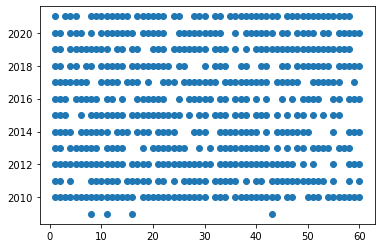

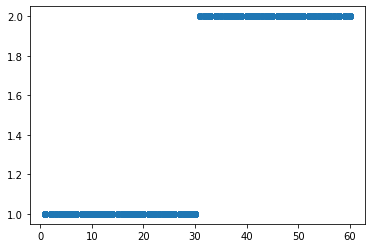

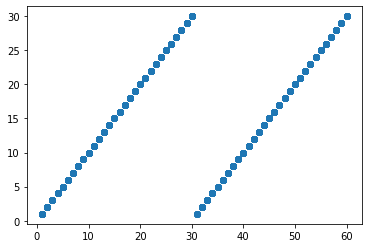

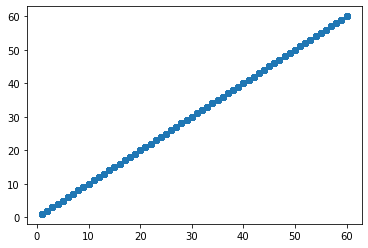

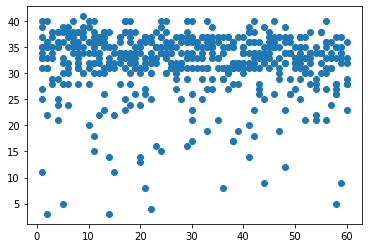

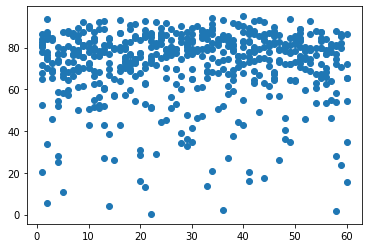

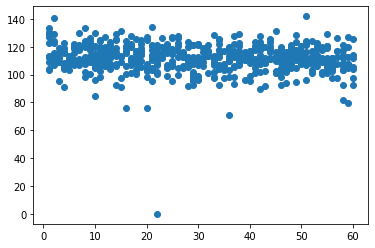

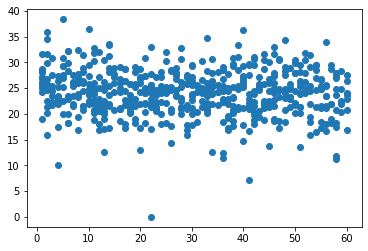

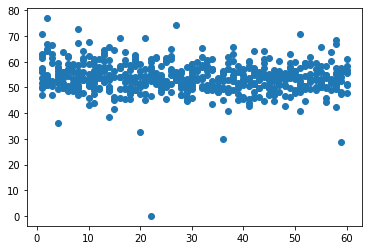

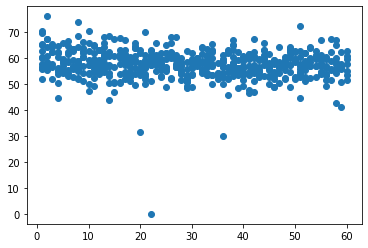

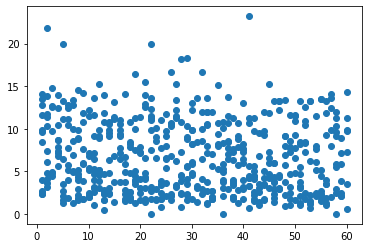

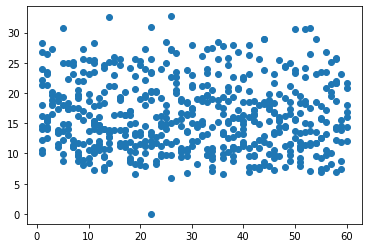

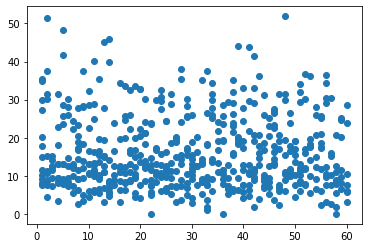

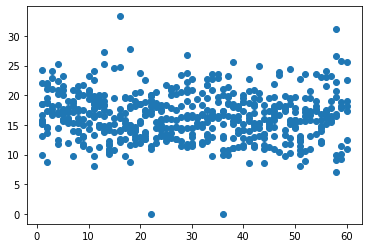

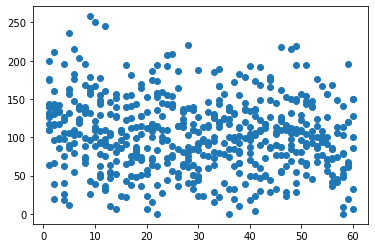

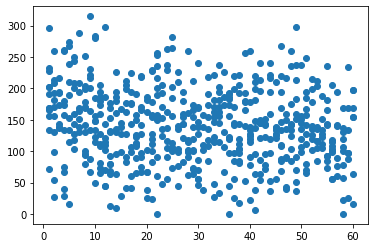

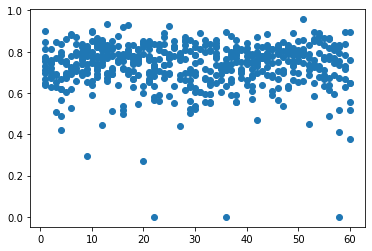

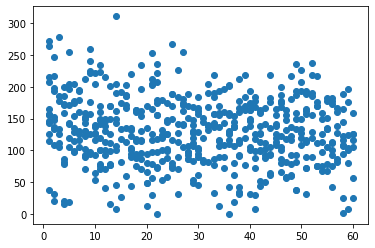

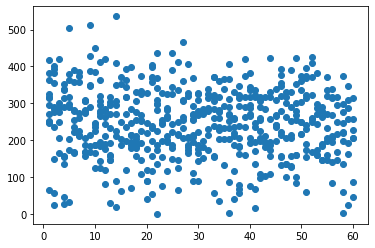

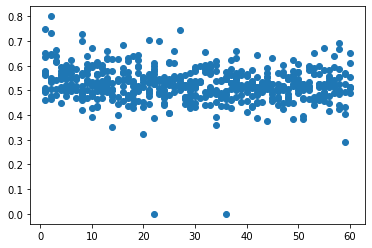

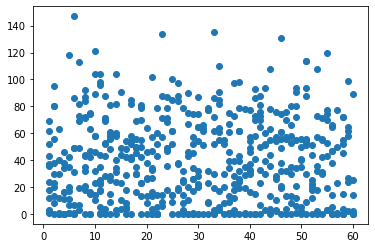

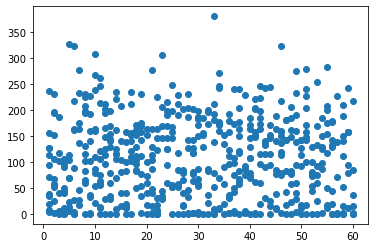

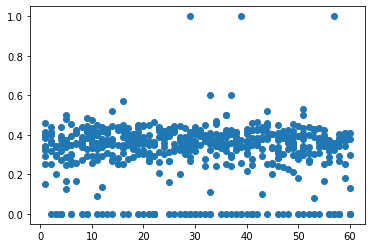

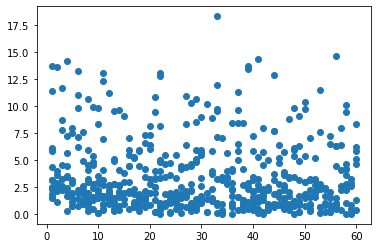

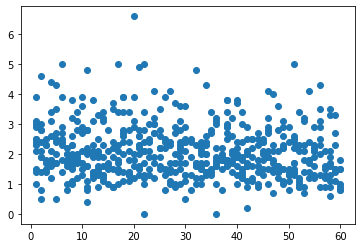

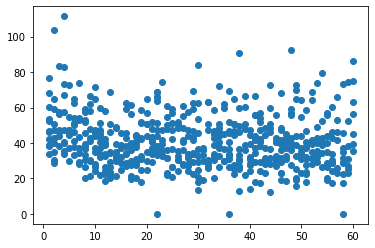

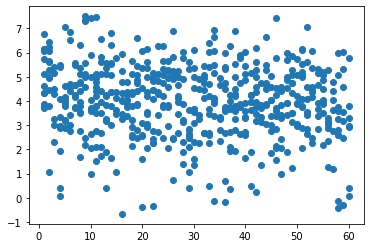

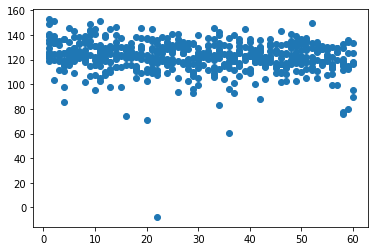

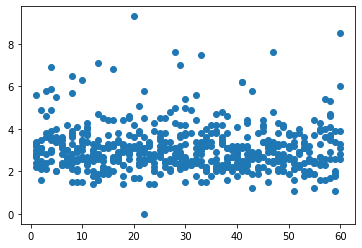

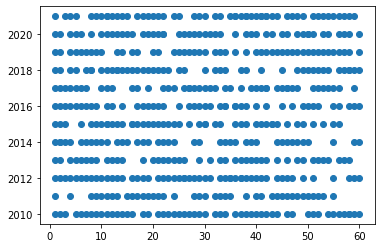

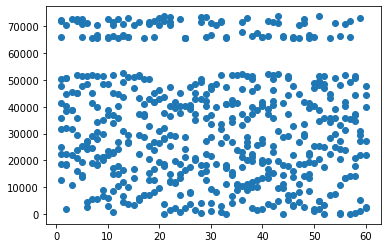

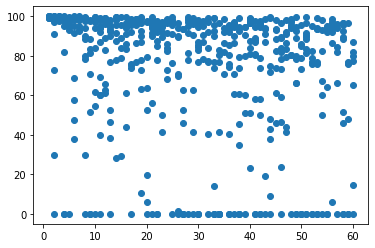

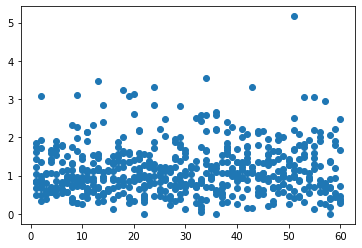

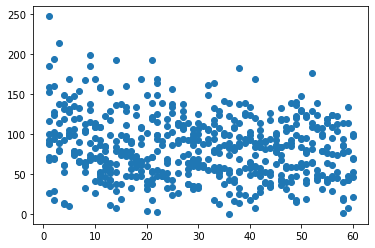

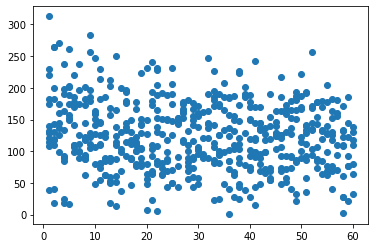

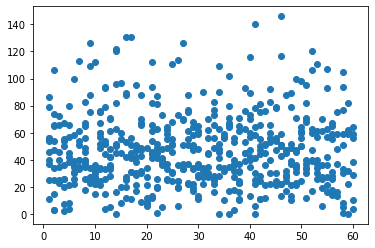

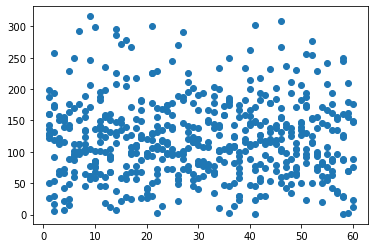

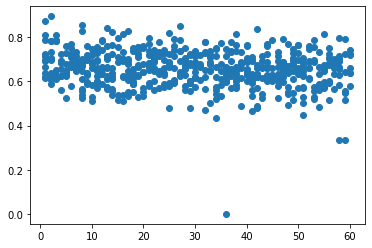

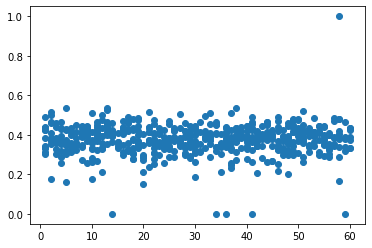

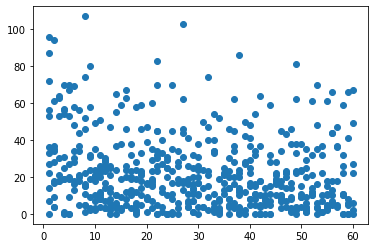

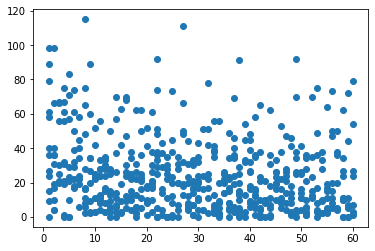

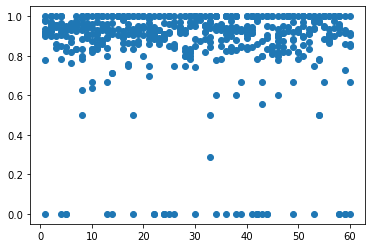

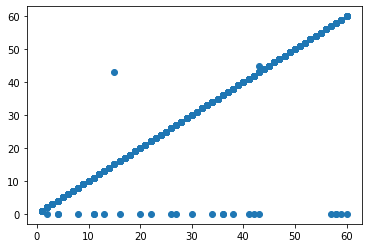

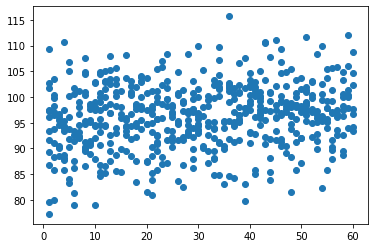

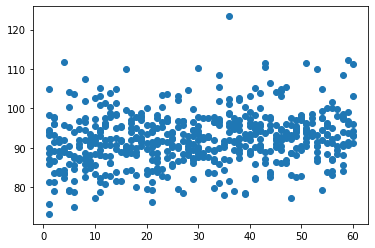

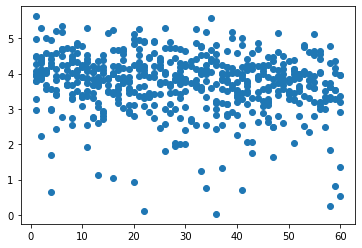

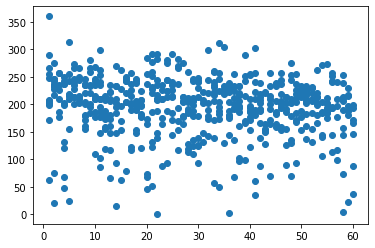

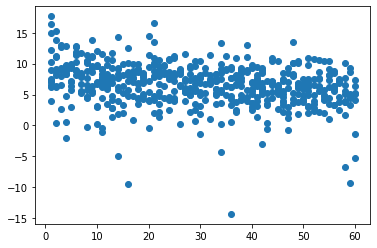

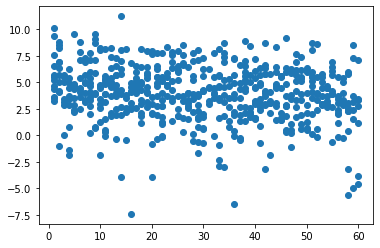

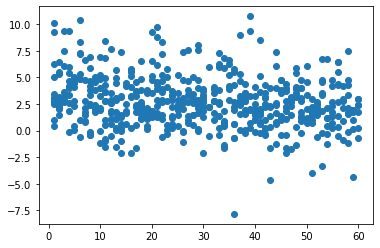

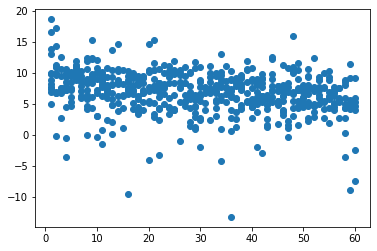

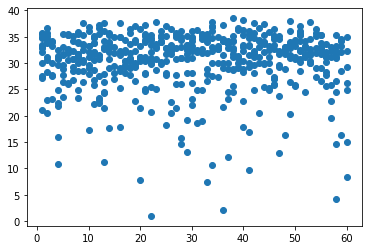

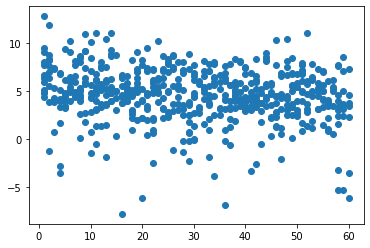

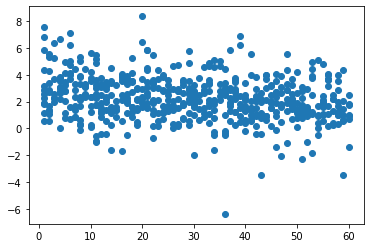

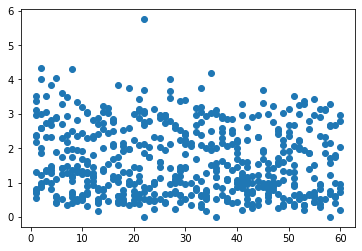

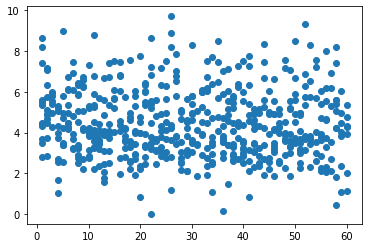

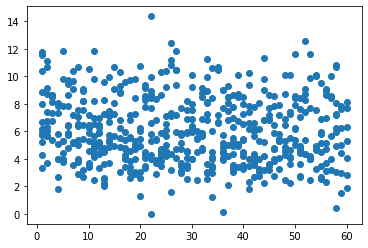

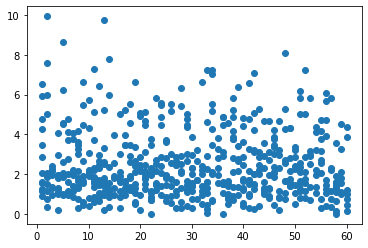

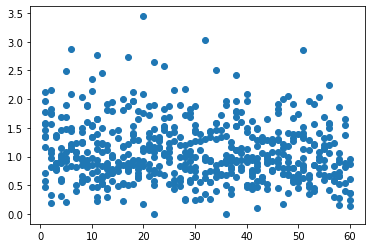

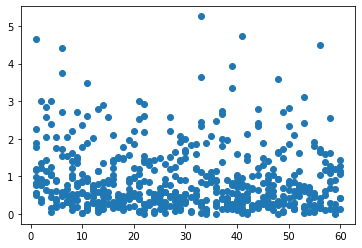

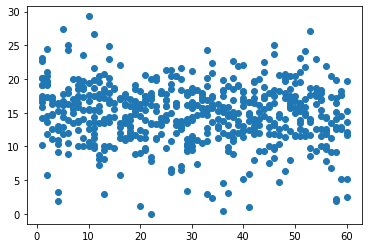

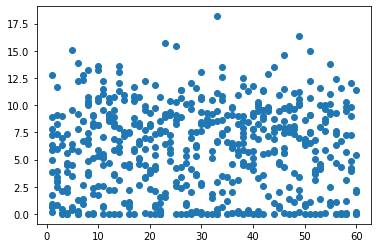

In [14]:
for column in num_df:
    plt.scatter(num_df['OVERALL'],num_df[column])
    plt.show()

In [15]:
mod_df.corr(method='spearman')['OVERALL'].sort_values(ascending=False)

OVERALL     1.000000
pick        0.903243
ROUND       0.865267
ROUND.1     0.495371
adrtg       0.209828
              ...   
dbpm       -0.187561
dgbpm      -0.223875
gbpm       -0.275956
bpm        -0.284005
Rec Rank   -0.316648
Name: OVERALL, Length: 62, dtype: float64

In [16]:
mod_df = mod_df.drop(['ROUND','ROUND.1','pick','year','player_name','team'], axis=1)
mod_df.index

Int64Index([   0,    1,    2,    3,    5,    8,    9,   11,   12,   14,
            ...
            1404, 1406, 1408, 1409, 1411, 1413, 1424, 1430, 1445, 1474],
           dtype='int64', length=551)

In [17]:
df_eleven = mod_df[mod_df['YEAR']== 2011]
df_eleven.index

Int64Index([1184, 1190, 1194, 1195, 1198, 1201, 1204, 1206, 1209, 1211, 1214,
            1217, 1220, 1221, 1224, 1227, 1230, 1237, 1242, 1245, 1246, 1249,
            1252, 1255, 1258, 1260, 1269, 1273, 1276, 1278, 1281, 1284, 1287,
            1290, 1293, 1296, 1297, 1300, 1303, 1305, 1308, 1311, 1312, 1319],
           dtype='int64')

In [18]:
mod_df1 = pd.get_dummies(mod_df, drop_first=True) 

X_train = mod_df1[mod_df1['YEAR'] != 2011].drop('OVERALL', axis=1)
X_test = mod_df1[mod_df1['YEAR'] == 2011].drop('OVERALL', axis=1)
y_train = mod_df1[mod_df1['YEAR'] != 2011]['OVERALL']
y_test = mod_df1[mod_df1['YEAR'] == 2011]['OVERALL']

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
predictions = model.predict(X_test)
predictions


array([-10.00013791,  47.59730187, -10.02782395,  16.05958076,
        15.29269732,  32.60683618,  30.50881809,  20.69605446,
        12.16286654,  33.82003092,  45.13046172,  27.19527931,
        15.55088489,  12.42122825,  31.65139677,  24.05025011,
        18.84443649,  51.55856818,  30.8432736 ,  28.77558772,
        21.46386688,  43.98151236,  32.66593641,  35.04787698,
        28.43301233,  23.6219644 ,  17.27689258,  38.3103839 ,
        36.64467016,  75.95332773,  36.67020047,  38.32584519,
        52.51106403,  33.2142247 ,  20.76510923,  41.13159291,
        27.34542484,  52.33319161,  52.41853358,  59.75079903,
        35.05884822,  58.85397024,  28.63537934,  50.53180464])

In [21]:
results = mod_df[mod_df['YEAR'] == 2011][['PLAYER']]
results['OVERALL'] = list(range(1,len(results)+1))
results['PREDS'] = predictions
a = results.sort_values('PREDS')
a['New DraftRank'] = list(range(1,len(a)+1))
a['PlusMinus'] = abs(a['OVERALL'] - a['New DraftRank'])
a

,PLAYER,OVERALL,PREDS,New DraftRank,PlusMinus
1194,Tristan Thompson,3,-10.027824,1,2
1184,Kyrie Irving,1,-10.000138,2,1
1209,Markieff Morris,9,12.162867,3,6
1221,Tobias Harris,14,12.421228,4,10
1198,Kemba Walker,5,15.292697,5,0
1220,Chris Singleton,13,15.550885,6,7
1195,Brandon Knight,4,16.059581,7,3
1269,Jordan Williams,27,17.276893,8,19
1230,Reggie Jackson,17,18.844436,9,8
1206,Alec Burks,8,20.696054,10,2


In [22]:
a['PlusMinus'].mean()

8.545454545454545

In [23]:
tab_data = mod_df[mod_df['YEAR'] == 2011]
tab_data['OVERALL'] = list(range(1,len(tab_data)+1))
tab_data['PREDS'] = predictions
tab_data = tab_data.sort_values('PREDS')
tab_data['New DraftRank'] = list(range(1,len(tab_data)+1))
tab_data['PlusMinus'] = abs(tab_data['OVERALL'] - tab_data['New DraftRank'])
tab_data.to_csv('tab_data.csv', encoding='utf-8', index=False)


<ipython-input-23-be57f134cee4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab_data['OVERALL'] = list(range(1,len(tab_data)+1))
<ipython-input-23-be57f134cee4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab_data['PREDS'] = predictions


In [24]:
import requests

url = "https://api-nba-v1.p.rapidapi.com/players"

querystring = {"name":"Thompson"}

headers = {
	"X-RapidAPI-Host": "api-nba-v1.p.rapidapi.com",
	"X-RapidAPI-Key": "fa93e11e51mshc521643fb46be05p1bf29djsnb966b78472f7"
}

response = requests.request("GET", url, headers=headers, params=querystring)
response.json()

{'get': 'players/',
 'parameters': {'name': 'Thompson'},
 'errors': [],
 'results': 8,
 'response': [{'id': 512,
   'firstname': 'Hollis',
   'lastname': 'Thompson',
   'birth': {'date': None, 'country': None},
   'nba': {'start': 0, 'pro': 0},
   'height': {'feets': None, 'inches': None, 'meters': None},
   'weight': {'pounds': None, 'kilograms': None},
   'college': None,
   'affiliation': None,
   'leagues': {'standard': {'jersey': 33, 'active': False, 'pos': None},
    'sacramento': {'jersey': 33, 'active': True, 'pos': 'F'},
    'vegas': {'jersey': 33, 'active': True, 'pos': 'F'}}},
  {'id': 513,
   'firstname': 'Jason',
   'lastname': 'Thompson',
   'birth': {'date': None, 'country': None},
   'nba': {'start': 0, 'pro': 0},
   'height': {'feets': None, 'inches': None, 'meters': None},
   'weight': {'pounds': None, 'kilograms': None},
   'college': None,
   'affiliation': None,
   'leagues': {'standard': {'jersey': 1, 'active': True, 'pos': 'F'}}},
  {'id': 514,
   'firstname': 'K

In [25]:
pd.json_normalize(response.json()['response'])

,id,firstname,lastname,college,affiliation,birth.date,birth.country,nba.start,nba.pro,height.feets,height.inches,height.meters,weight.pounds,weight.kilograms,leagues.standard.jersey,leagues.standard.active,leagues.standard.pos,leagues.sacramento.jersey,leagues.sacramento.active,leagues.sacramento.pos,leagues.vegas.jersey,leagues.vegas.active,leagues.vegas.pos
0,512,Hollis,Thompson,None,None,None,None,0,0,None,None,None,None,None,33.0,False,None,33.0,True,F,33.0,True,F
1,513,Jason,Thompson,None,None,None,None,0,0,None,None,None,None,None,1.0,True,F,NaN,NaN,NaN,NaN,NaN,NaN
2,514,Klay,Thompson,Washington State,Washington State/USA,1990-02-08,USA,2011,8,6,6,1.98,220,99.8,11.0,True,G,NaN,NaN,NaN,NaN,NaN,NaN
3,515,Tristan,Thompson,Texas-Austin,Texas-Austin/Canada,1991-03-13,Canada,2011,10,6,9,2.06,254,115.2,3.0,True,C-F,NaN,NaN,NaN,NaN,NaN,NaN
4,1645,Shevon,Thompson,George Mason,George Mason/Jamaica,1993-06-10,Jamaica,0,0,7,0,2.13,242,109.8,NaN,NaN,NaN,NaN,NaN,NaN,27.0,True,C
5,1646,Trevor,Thompson,Ohio State,Ohio State/USA,1994-06-12,USA,0,0,7,0,2.13,250,113.4,NaN,NaN,NaN,NaN,NaN,NaN,55.0,True,C
6,2333,Darius,Thompson,None,None,None,None,0,0,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,51.0,True,G
7,3237,Ethan,Thompson,Oregon State,Oregon State/Puerto Rico,1999-05-04,Puerto Rico,0,0,6,5,1.96,195,88.5,15.0,True,G,NaN,NaN,NaN,15.0,True,G


In [26]:
import time
import datetime
df_new = pd.DataFrame()
h = 0
for i in a.PLAYER:
    f_name, l_name = i.split()
    print(l_name)
    querystring = {"name":l_name}
    response = requests.request("GET", url, headers=headers, params=querystring)
    for j in response.json()['response']:
        if j['firstname'] == f_name:
            df_new = df_new.append(pd.json_normalize(response.json()['response'][h]))
        h += 1
    time.sleep(20)
        
    h = 0

Thompson
Irving
Morris
Harris
Walker
Singleton
Knight
Williams
Jackson
Burks
Leslie
Joseph
Honeycutt
Faried
Shumpert
Selby
Mack
Majok
Cole
Thompson
Johnson
Smith
Fredette
Harper
Goudelock
Leonard
Singler
Liggins
Leuer
Lee
Parsons
Jenkins
Benson
Butler
Vucevic
Williams
Thomas
Hamilton
Allen
Diebler
Harrellson
Moore
Macklin
Morris


In [27]:
df_new

,id,firstname,lastname,college,affiliation,birth.date,birth.country,nba.start,nba.pro,height.feets,height.inches,height.meters,weight.pounds,weight.kilograms,leagues.standard.jersey,leagues.standard.active,leagues.standard.pos,leagues.vegas.jersey,leagues.vegas.active,leagues.vegas.pos,leagues.sacramento.jersey,leagues.sacramento.active,leagues.sacramento.pos,leagues.utah.jersey,leagues.utah.active,leagues.utah.pos
0,515,Tristan,Thompson,Texas-Austin,Texas-Austin/Canada,1991-03-13,Canada,2011,10,6,9,2.06,254,115.2,3,True,C-F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,261,Kyrie,Irving,Duke,Duke/Australia,1992-03-23,Australia,2011,10,6,2,1.88,195,88.5,11,True,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,374,Markieff,Morris,Kansas,Kansas/USA,1989-09-02,USA,2011,10,6,9,2.06,245,111.1,8,True,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,222,Tobias,Harris,Tennessee,Tennessee/USA,1992-07-15,USA,2011,10,6,7,2.01,226,102.5,12,True,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,538,Kemba,Walker,Connecticut,Connecticut/USA,1990-05-08,USA,2011,10,6,0,1.83,184,83.5,8,True,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,297,Brandon,Knight,Kentucky,Kentucky/USA,1991-12-02,USA,2011,8,6,2,1.88,182,82.6,20,True,G,27.0,True,G,NaN,NaN,NaN,NaN,NaN,NaN
0,264,Reggie,Jackson,Boston College,Boston College/USA,1990-04-16,USA,2011,10,6,2,1.88,208,94.3,1,True,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,84,Alec,Burks,Colorado,Colorado/USA,1991-07-20,USA,2011,10,6,6,1.98,214,97.1,18,True,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,823,Travis,Leslie,None,None,None,None,0,0,None,None,None,None,None,1,True,G,7.0,True,G,NaN,NaN,NaN,NaN,NaN,NaN
0,287,Cory,Joseph,Texas-Austin,Texas-Austin/Canada,1991-08-20,Canada,2011,10,6,3,1.9,200,90.7,18,True,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
url = "https://api-nba-v1.p.rapidapi.com/players/statistics"
nba_stats = pd.DataFrame()
for i in df_new.id:
    print(i)
    for o in range(2015,2022):
        print(o)
        querystring = {"id":i,"season":o}
        response = requests.request("GET", url, headers=headers, params=querystring)
        k = pd.json_normalize(response.json()['response'])
        k['YEAR'] = o
        nba_stats = nba_stats.append(k)
        time.sleep(10)
    
    
nba_stats

515
2015
2016
2017
2018
2019
2020
2021
261
2015
2016
2017
2018
2019
2020
2021
374
2015
2016
2017
2018
2019
2020
2021
222
2015
2016
2017
2018
2019
2020
2021
538
2015
2016
2017
2018
2019
2020
2021
297
2015
2016
2017
2018
2019
2020
2021
264
2015
2016
2017
2018
2019
2020
2021
84
2015
2016
2017
2018
2019
2020
2021
823
2015
2016
2017
2018
2019
2020
2021
287
2015
2016
2017
2018
2019
2020
2021
167
2015
2016
2017
2018
2019
2020
2021
478
2015
2016
2017
2018
2019
2020
2021
332
2015
2016
2017
2018
2019
2020
2021
2513
2015
2016
2017
2018
2019
2020
2021
110
2015
2016
2017
2018
2019
2020
2021
514
2015
2016
2017
2018
2019
2020
2021
647
2015
2016
2017
2018
2019
2020
2021
777
2015
2016
2017
2018
2019
2020
2021
1780
2015
2016
2017
2018
2019
2020
2021
1700
2015
2016
2017
2018
2019
2020
2021
198
2015
2016
2017
2018
2019
2020
2021
314
2015
2016
2017
2018
2019
2020
2021
484
2015
2016
2017
2018
2019
2020
2021
318
2015
2016
2017
2018
2019
2020
2021
316
2015
2016
2017
2018
2019
2020
2021
412
2015
2016
2017
2018

,points,pos,min,fgm,fga,fgp,ftm,fta,ftp,tpm,tpa,tpp,offReb,defReb,totReb,assists,pFouls,steals,turnovers,blocks,plusMinus,comment,player.id,player.firstname,player.lastname,team.id,team.name,team.nickname,team.code,team.logo,game.id,YEAR
0,2.0,None,24:55,1.0,4.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,12.0,0.0,4.0,1.0,1.0,0.0,-6,None,515.0,Tristan,Thompson,7.0,Cleveland Cavaliers,Cavaliers,CLE,https://upload.wikimedia.org/wikipedia/fr/thum...,111.0,2015
1,5.0,None,19:59,2.0,2.0,100,1.0,2.0,50.0,0.0,0.0,0.0,3.0,5.0,8.0,1.0,4.0,0.0,2.0,0.0,19,None,515.0,Tristan,Thompson,7.0,Cleveland Cavaliers,Cavaliers,CLE,https://upload.wikimedia.org/wikipedia/fr/thum...,120.0,2015
2,13.0,None,26:03,6.0,9.0,66.7,1.0,2.0,50.0,0.0,0.0,0.0,2.0,7.0,9.0,1.0,1.0,0.0,0.0,1.0,14,None,515.0,Tristan,Thompson,7.0,Cleveland Cavaliers,Cavaliers,CLE,https://upload.wikimedia.org/wikipedia/fr/thum...,130.0,2015
3,8.0,None,26:18,4.0,7.0,57.1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,1.0,2.0,0.0,0.0,3.0,5,None,515.0,Tristan,Thompson,7.0,Cleveland Cavaliers,Cavaliers,CLE,https://upload.wikimedia.org/wikipedia/fr/thum...,155.0,2015
4,10.0,None,25:36,4.0,6.0,66.7,2.0,2.0,100,0.0,0.0,0.0,4.0,9.0,13.0,1.0,1.0,0.0,1.0,1.0,15,None,515.0,Tristan,Thompson,7.0,Cleveland Cavaliers,Cavaliers,CLE,https://upload.wikimedia.org/wikipedia/fr/thum...,172.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,0,None,4:27,0,1,0.0,0,0,0.0,0,1,0.0,0,0,0,0,0,1,3,0,-9,None,1004.0,Darius,Morris,31.0,San Antonio Spurs,Spurs,SAS,https://upload.wikimedia.org/wikipedia/fr/0/0e...,6244.0,2019
4,0,None,0:00,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,None,1004.0,Darius,Morris,31.0,San Antonio Spurs,Spurs,SAS,https://upload.wikimedia.org/wikipedia/fr/0/0e...,6256.0,2019
5,0,None,0:00,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,None,1004.0,Darius,Morris,31.0,San Antonio Spurs,Spurs,SAS,https://upload.wikimedia.org/wikipedia/fr/0/0e...,6269.0,2019
6,4,None,11:29,1,3,33.3,1,2,50.0,1,1,100,0,1,1,2,3,0,2,0,0,None,1004.0,Darius,Morris,31.0,San Antonio Spurs,Spurs,SAS,https://upload.wikimedia.org/wikipedia/fr/0/0e...,6290.0,2019


In [31]:
nba_stats

,points,pos,min,fgm,fga,fgp,ftm,fta,ftp,tpm,tpa,tpp,offReb,defReb,totReb,assists,pFouls,steals,turnovers,blocks,plusMinus,comment,player.id,player.firstname,player.lastname,team.id,team.name,team.nickname,team.code,team.logo,game.id,YEAR
0,2.0,None,24:55,1.0,4.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,12.0,0.0,4.0,1.0,1.0,0.0,-6,None,515.0,Tristan,Thompson,7.0,Cleveland Cavaliers,Cavaliers,CLE,https://upload.wikimedia.org/wikipedia/fr/thum...,111.0,2015
1,5.0,None,19:59,2.0,2.0,100,1.0,2.0,50.0,0.0,0.0,0.0,3.0,5.0,8.0,1.0,4.0,0.0,2.0,0.0,19,None,515.0,Tristan,Thompson,7.0,Cleveland Cavaliers,Cavaliers,CLE,https://upload.wikimedia.org/wikipedia/fr/thum...,120.0,2015
2,13.0,None,26:03,6.0,9.0,66.7,1.0,2.0,50.0,0.0,0.0,0.0,2.0,7.0,9.0,1.0,1.0,0.0,0.0,1.0,14,None,515.0,Tristan,Thompson,7.0,Cleveland Cavaliers,Cavaliers,CLE,https://upload.wikimedia.org/wikipedia/fr/thum...,130.0,2015
3,8.0,None,26:18,4.0,7.0,57.1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,1.0,2.0,0.0,0.0,3.0,5,None,515.0,Tristan,Thompson,7.0,Cleveland Cavaliers,Cavaliers,CLE,https://upload.wikimedia.org/wikipedia/fr/thum...,155.0,2015
4,10.0,None,25:36,4.0,6.0,66.7,2.0,2.0,100,0.0,0.0,0.0,4.0,9.0,13.0,1.0,1.0,0.0,1.0,1.0,15,None,515.0,Tristan,Thompson,7.0,Cleveland Cavaliers,Cavaliers,CLE,https://upload.wikimedia.org/wikipedia/fr/thum...,172.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,0,None,4:27,0,1,0.0,0,0,0.0,0,1,0.0,0,0,0,0,0,1,3,0,-9,None,1004.0,Darius,Morris,31.0,San Antonio Spurs,Spurs,SAS,https://upload.wikimedia.org/wikipedia/fr/0/0e...,6244.0,2019
4,0,None,0:00,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,None,1004.0,Darius,Morris,31.0,San Antonio Spurs,Spurs,SAS,https://upload.wikimedia.org/wikipedia/fr/0/0e...,6256.0,2019
5,0,None,0:00,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,None,1004.0,Darius,Morris,31.0,San Antonio Spurs,Spurs,SAS,https://upload.wikimedia.org/wikipedia/fr/0/0e...,6269.0,2019
6,4,None,11:29,1,3,33.3,1,2,50.0,1,1,100,0,1,1,2,3,0,2,0,0,None,1004.0,Darius,Morris,31.0,San Antonio Spurs,Spurs,SAS,https://upload.wikimedia.org/wikipedia/fr/0/0e...,6290.0,2019


In [32]:
nba_stats.to_csv('nba_stats.csv', encoding='utf-8', index=False)